# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
# Atualmente, este é meu bloco fixo de importações
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import requests as rq
%matplotlib inline

# Este é meu novo bloco de importações: apenas para uso de Árvores de Decisão
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# Recebi um aviso de FutureWarning sobre a Matriz de Classificação, então atualizei meu scikit-learn para 1.2.2 e a importação
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

base = pd.read_csv("scikitlearn.csv")

# Separando as variáveis
x = base.drop("mau", axis=1)
y = base.mau

# Separando as bases de teste & treino das minhas variáveis
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

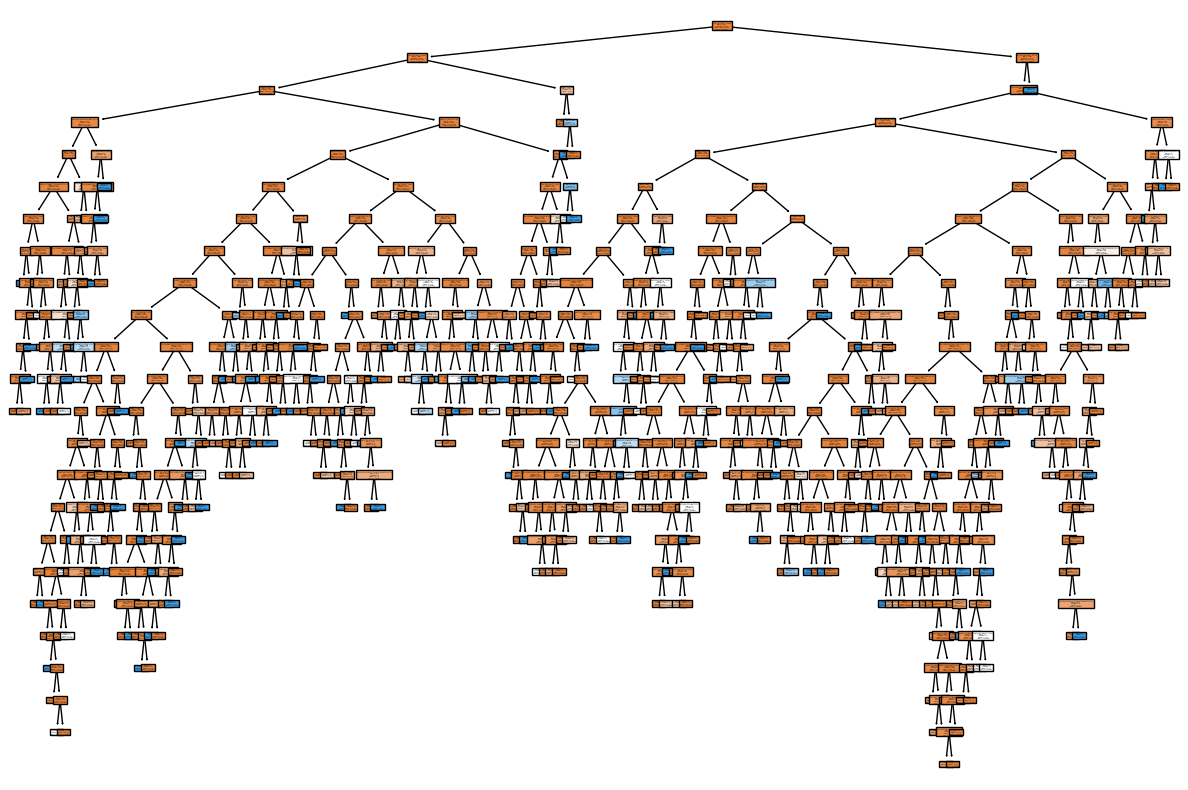

In [2]:
# Definindo a minha DecisionTree_Classifier e Fittando ela com as minhas variáveis
dt_clf_treino = DecisionTreeClassifier(random_state=100)
dt_clf_treino = dt_clf_treino.fit(x_treino, y_treino)

# Visualizando a Árvore. Testei algumas proporções e adaptei para atual, mesmo não sendo perfeita; eu tive que escolher
plt.figure(figsize=(15, 10))
plot_tree(dt_clf_treino,
          filled=True,
          class_names=["Aprovado", "Reprovado"],
          feature_names=x_treino.columns);

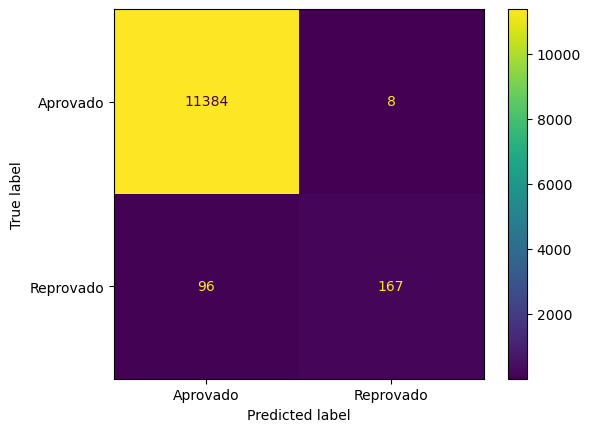

In [5]:
# Produzindo a matriz de classificação treino
ConfusionMatrixDisplay.from_estimator(dt_clf_treino,
                                      x_treino,
                                      y_treino,
                                      display_labels=["Aprovado", "Reprovado"])

In [20]:
# Calculando a pontuação de exatidão da minha estimativa de treino gerada pela Árvore de Decisão Sem Podas
estimativa_treino = dt_clf_treino.predict(x_treino)
round(accuracy_score(y_treino, estimativa_treino), 4)

0.9911

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [9]:
# Classificando a base de teste com a árvore treinada
estimativa_teste = dt_clf_treino.predict(x_teste)

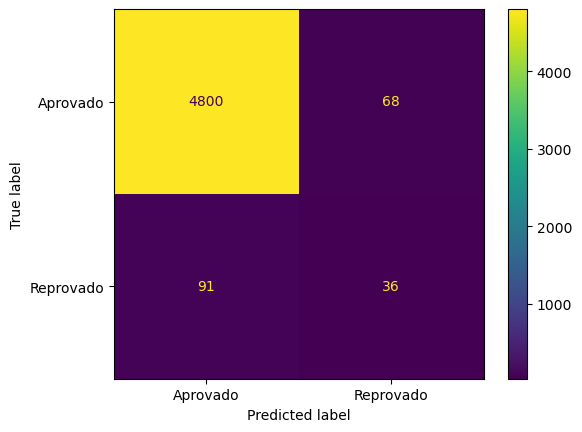

In [7]:
# Produzindo a matriz de classificação teste
ConfusionMatrixDisplay.from_estimator(dt_clf_treino,
                                      x_teste,
                                      y_teste,
                                      display_labels=["Aprovado", "Reprovado"])

In [19]:
# Calculando a pontuação de exatidão da minha estimativa de teste gerada pela Árvore de Decisão Sem Podas
round(accuracy_score(y_teste, estimativa_teste), 4)

0.9682

A porcentagem de classificados como MAU na base de teste é de 2.08%


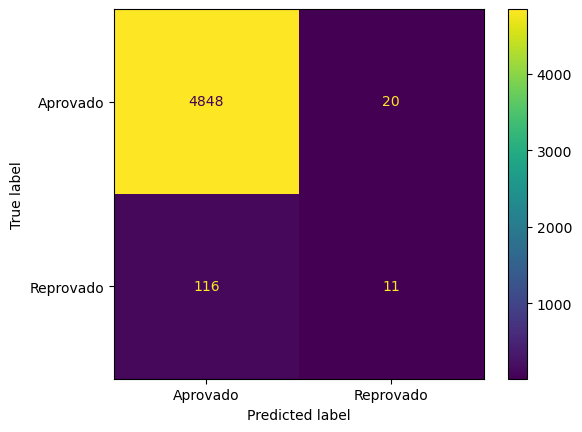

In [16]:
# Definindo a minha DecisionTree_Classifier com os novos hiperparâmetros e fittando com as minhas variáveis
dt_clf_podada = DecisionTreeClassifier(random_state=123, min_samples_leaf=5, max_depth=10)
dt_clf_podada = dt_clf_podada.fit(x_treino, y_treino)

# Produzindo a matriz de classificação para a base de teste
ConfusionMatrixDisplay.from_estimator(dt_clf_podada,
                                      x_teste,
                                      y_teste,
                                      display_labels=["Aprovado", "Reprovado"])

reprovado_proporcao = np.sum(estimativa_teste == 1)/len(estimativa_teste)
print(f"A porcentagem de classificados como MAU na base de teste é de {reprovado_proporcao:.2%}")

In [18]:
# Caso todos fossem classificados como "bons", a conta ficaria:
round((4848+11)/(4848+11+116+20), 4)

0.9728